### Question 1

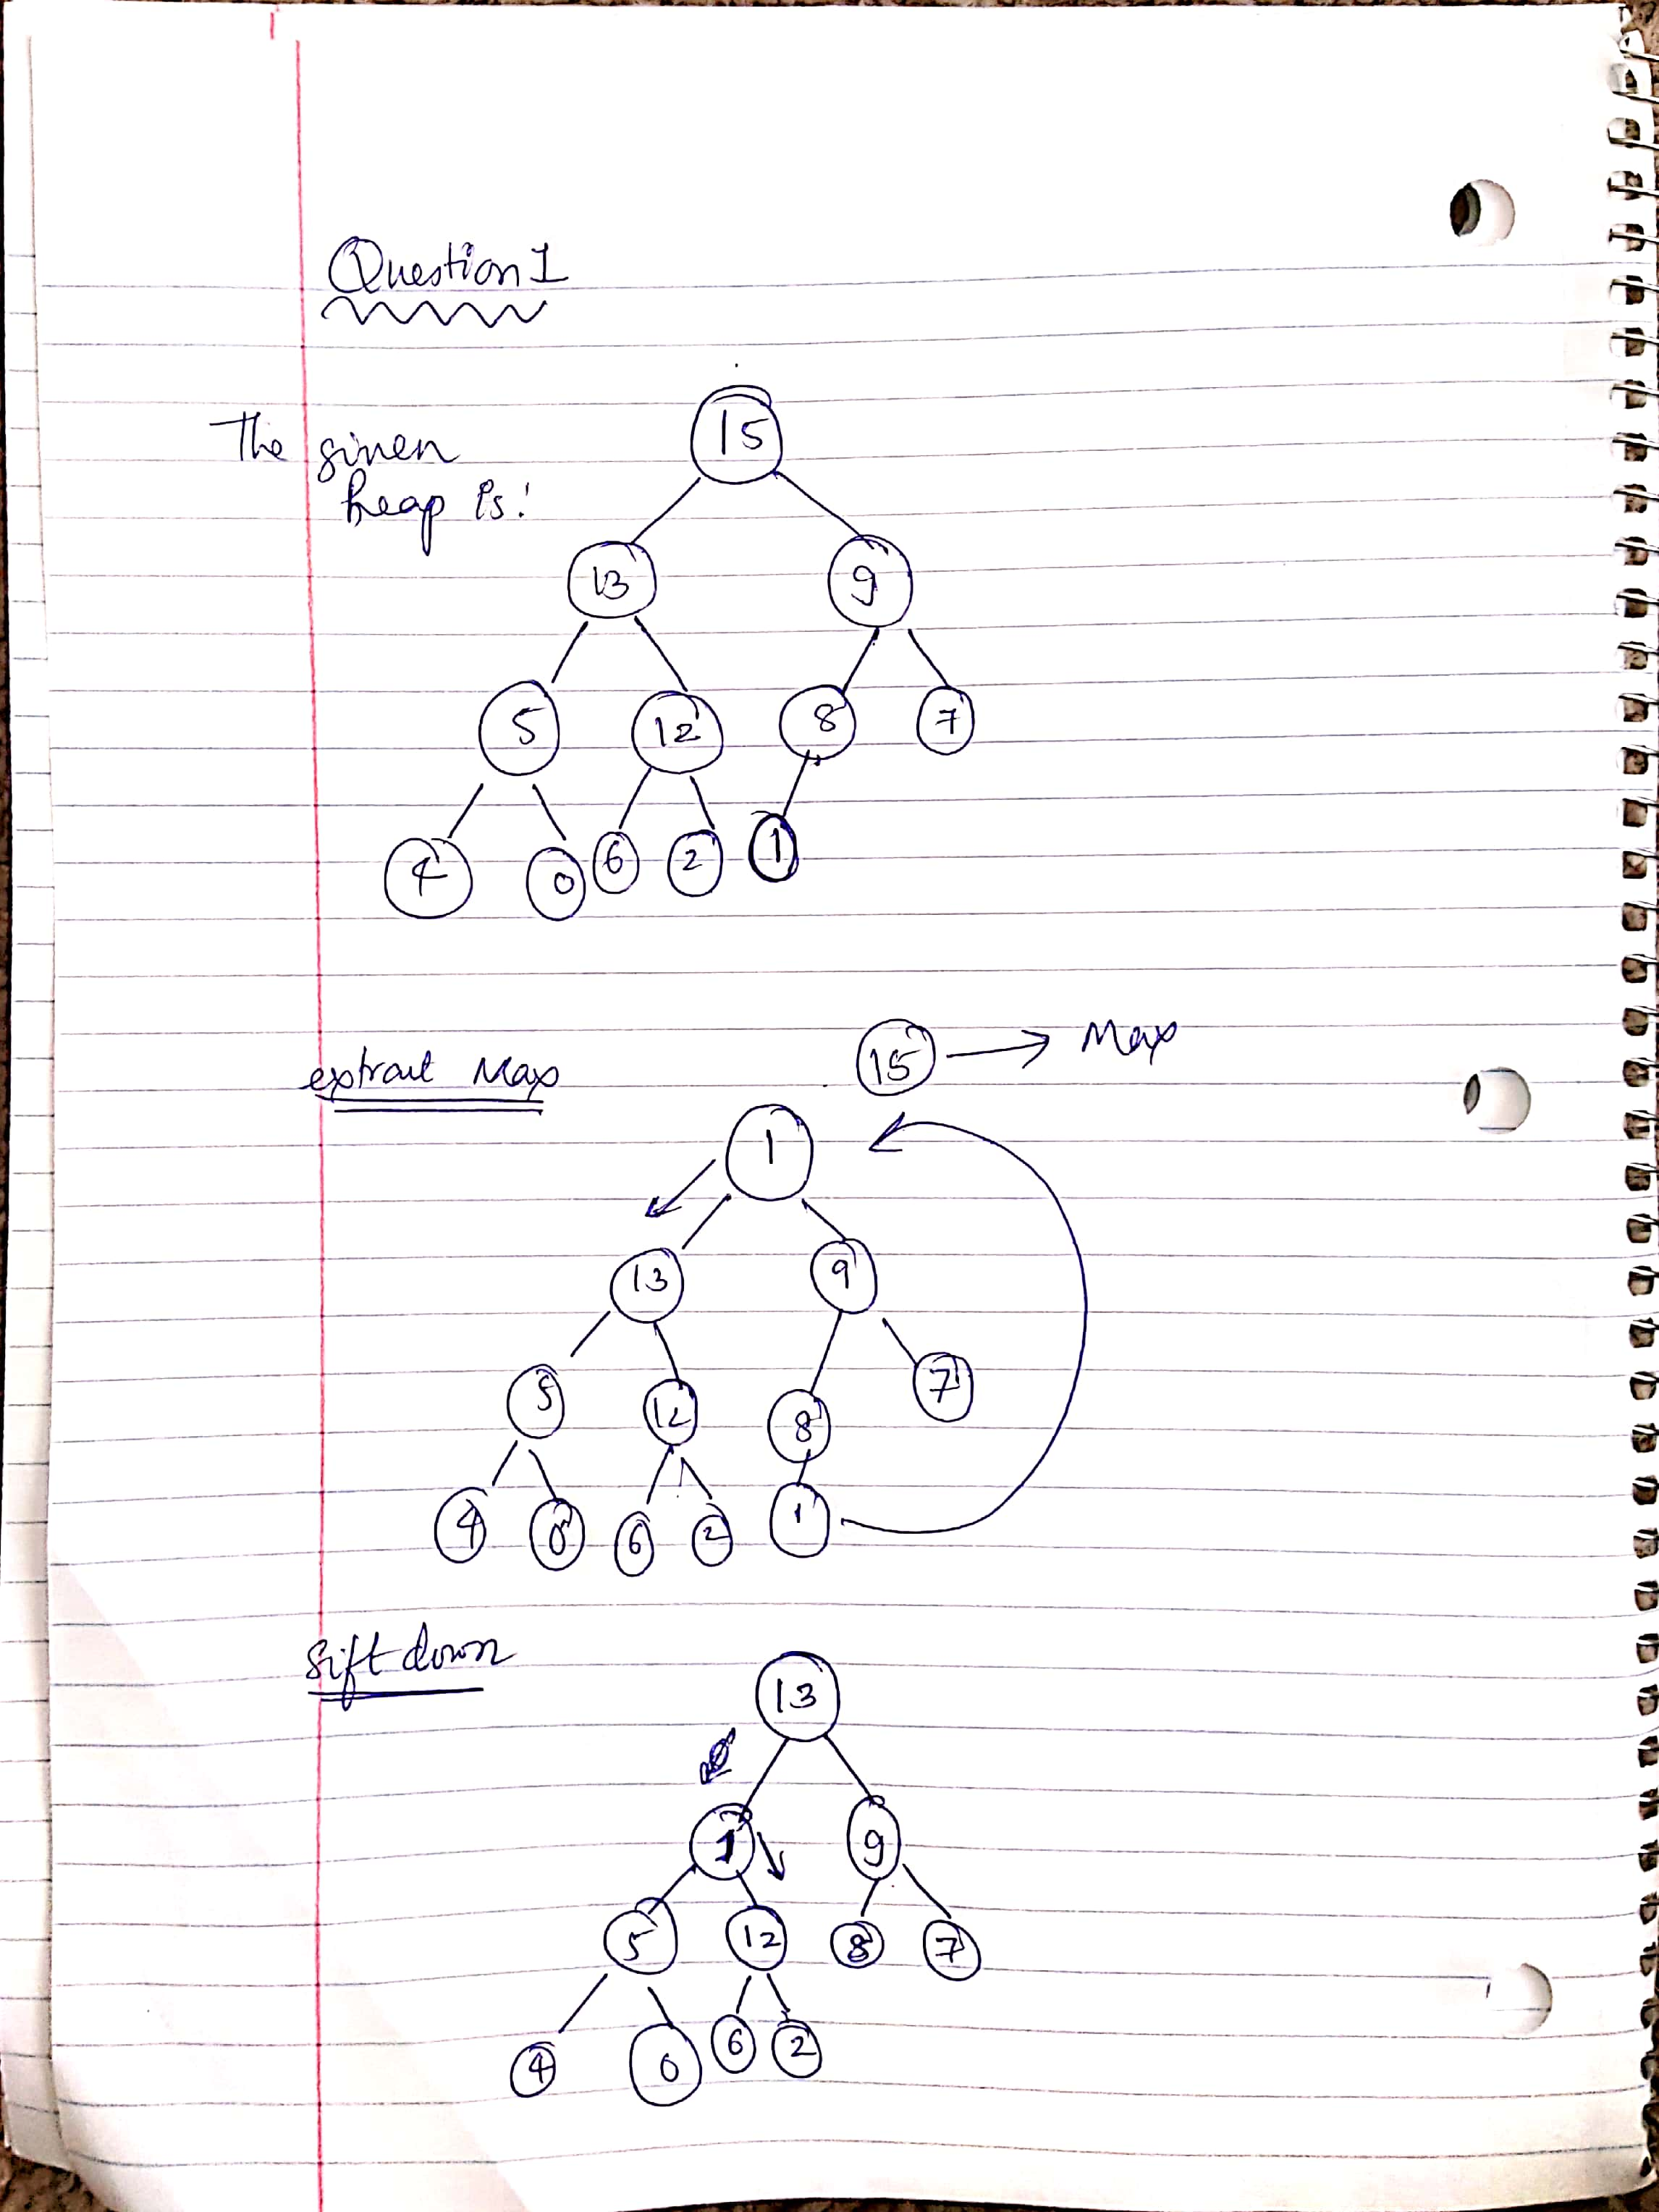

In [27]:
from IPython.display import Image
from IPython.core.display import HTML
PATH = "C:/Users/ntihish/Documents/IUB/Applied Algos/Assignments/Assignment 2/"
Image(filename = PATH + "Q_1_1.jpg",width = 600,height = 200)

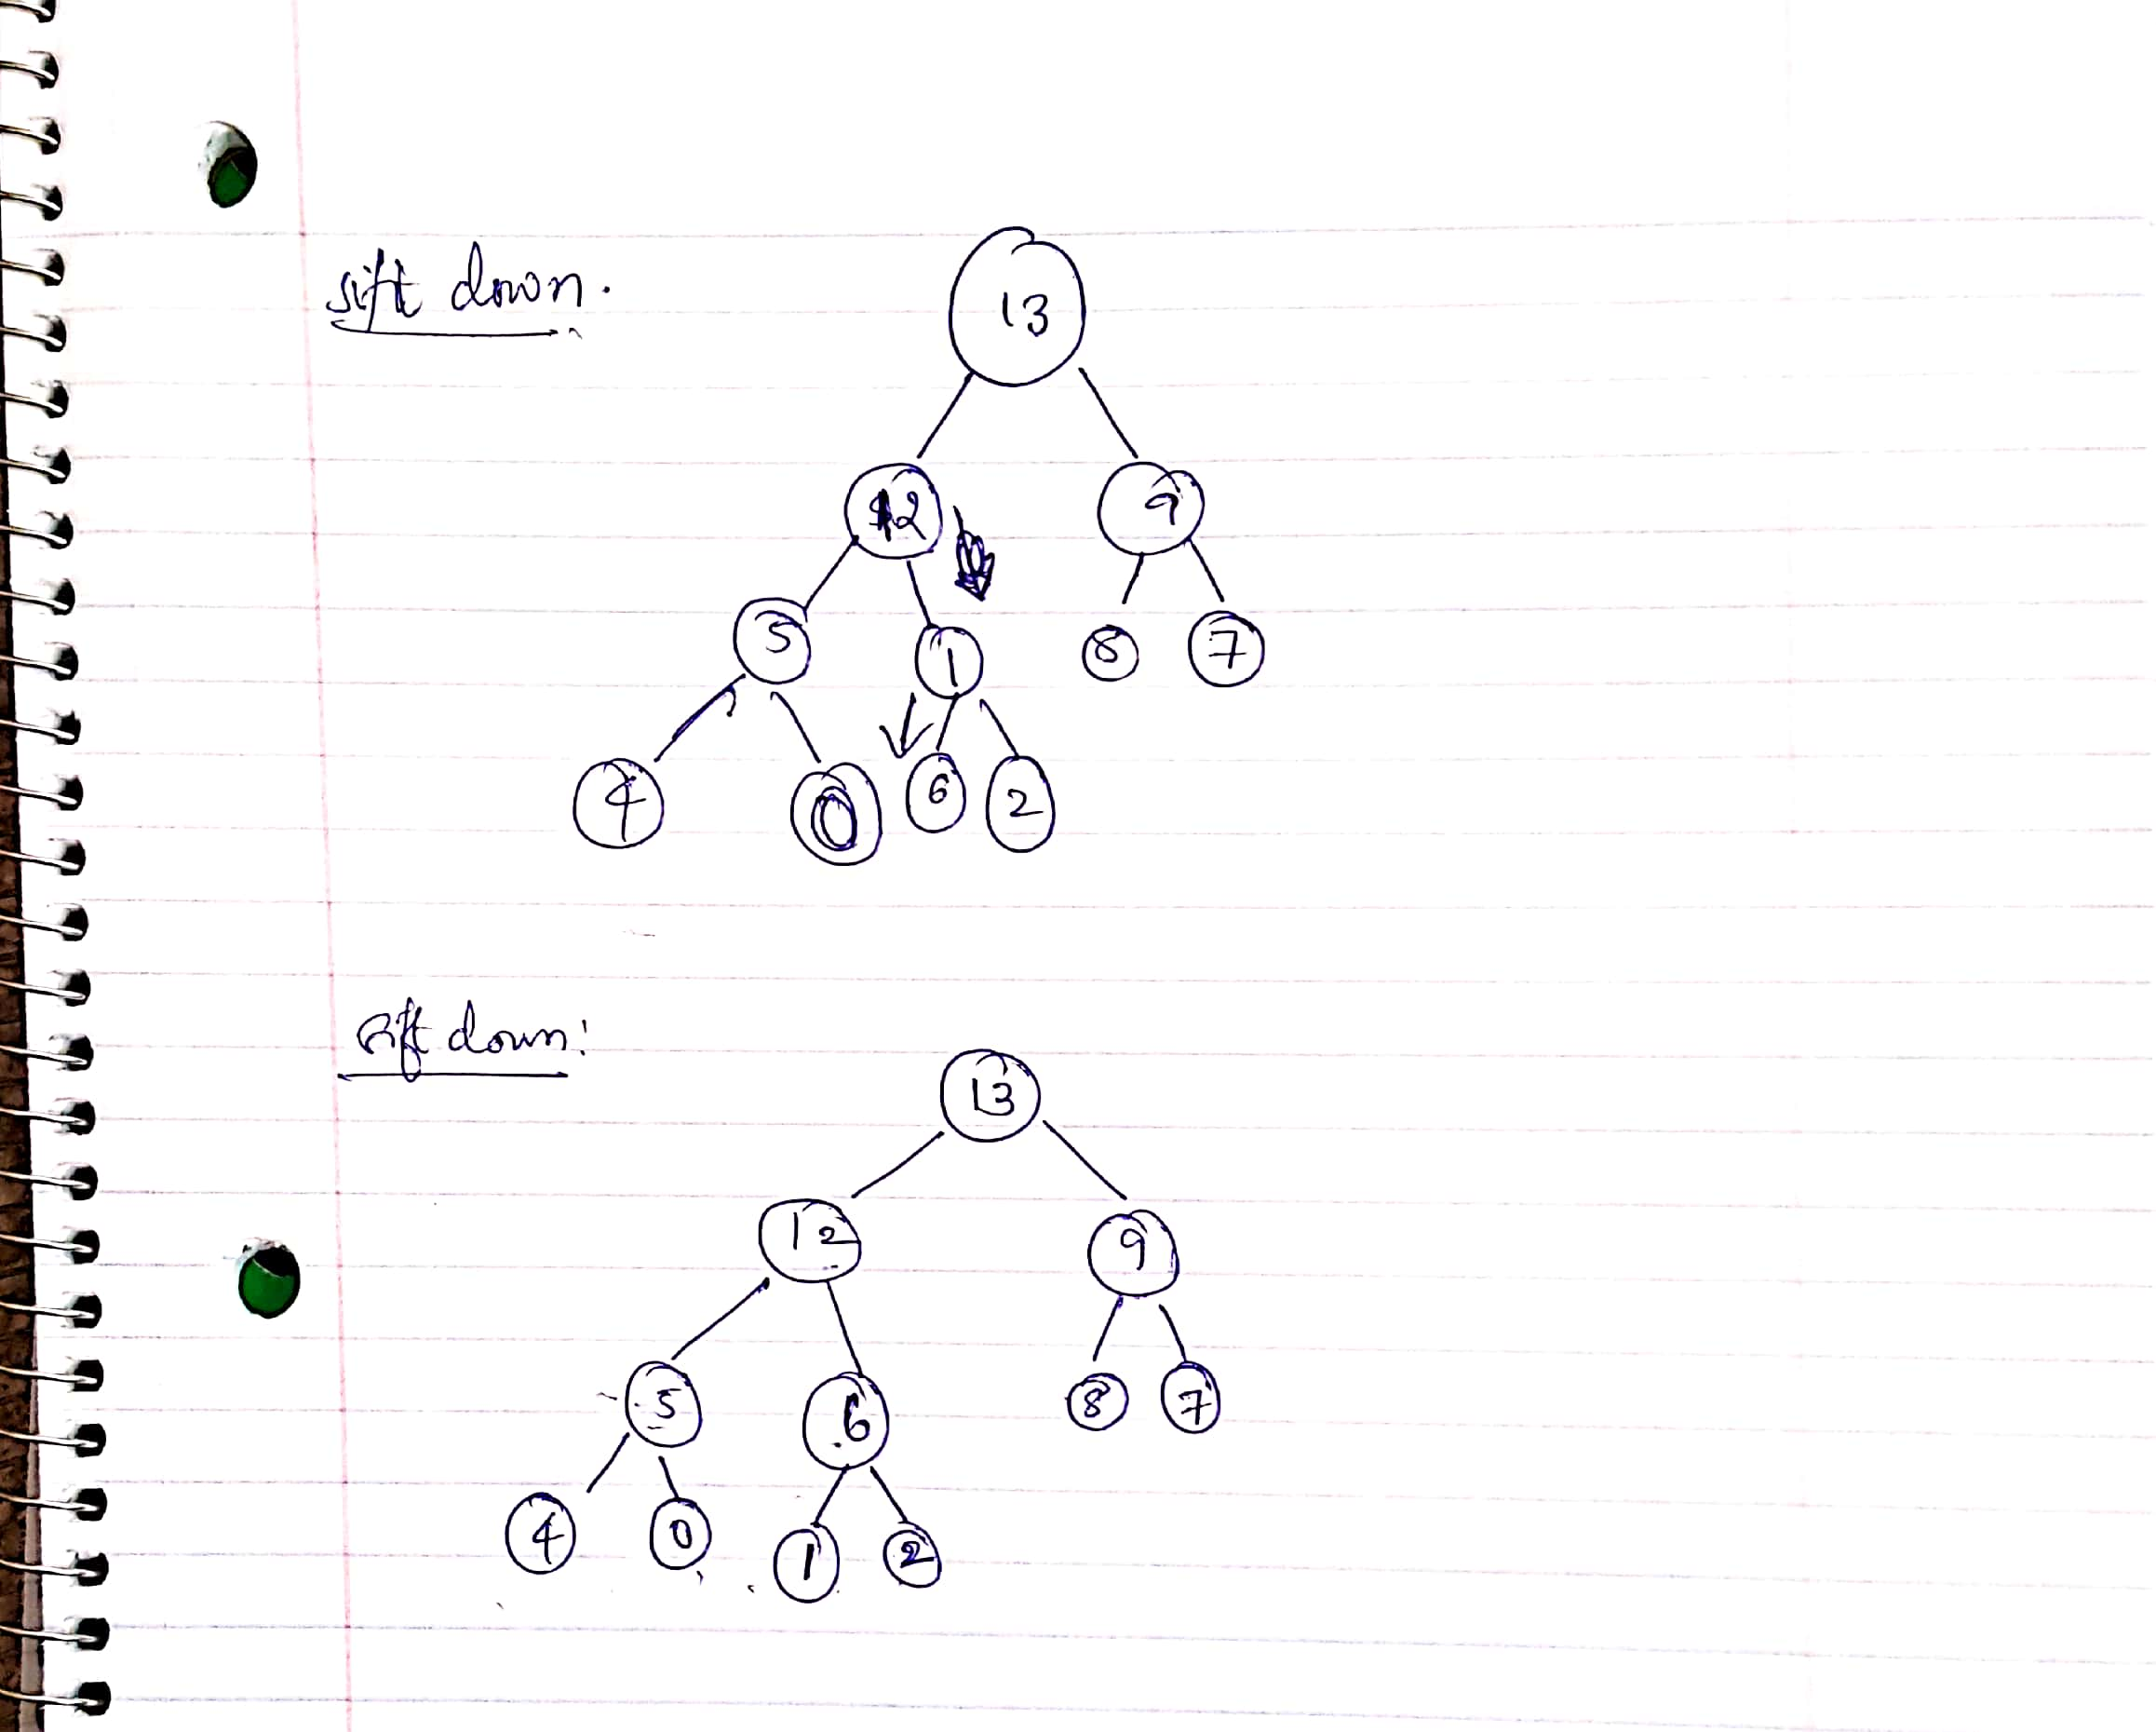

In [26]:
Image(filename = PATH + "Q_1_2.jpg",width = 600,height = 200)

In [4]:
### code for heap
def swap(pos1,pos2,listToBeAltered):
    temp = listToBeAltered[pos1]
    listToBeAltered[pos1] = listToBeAltered[pos2]
    listToBeAltered[pos2] = temp
    
    pass



def heapify(listToConvert, position):
    ##position form 1
    initParent = listToConvert[position]
    leftChild = -float("Inf")
    rightChild = -float("Inf")
    newPosition = position
    
    if 2*position+2 < len(listToConvert): ##index in range or there exists a child
        rightChild = listToConvert[2*position+2] 
    
    if 2*position+1 < len(listToConvert):
         ##pos
        leftChild = listToConvert[2*position+1] ##2*pos
         ## 2*pos+1
        
        
        if  leftChild > initParent and   leftChild >rightChild: ##left child is the greatest
            swap(2*position+1,position,listToConvert) ##swap parent with right
            newPosition = 2*position+1
            
        
        elif  rightChild > initParent and rightChild > leftChild: ##right child is the greatest
            swap(2*position+2,position,listToConvert) ##swap parent with right
            newPosition = 2*position+2
        
        if newPosition != position:
            print(listToConvert)
            
            heapify(listToConvert, newPosition)
        
    
    pass


def extractMax(heapedList):
    maxElem = heapedList[0]
    heapedList[0] = heapedList[-1] 
    del heapedList[-1] 
    heapify(heapedList,0)
        
    return maxElem

def buildMaxHeap(listToConvert):
    ##from last but one layer of nodes do heapify
    lastPosition = len(listToConvert)-1
    
    for i in range(int(lastPosition/2 -1),0,-1):
        heapify(listToConvert,i)


        
myList = [15, 13, 9, 5, 12, 8, 7, 4, 0, 6, 2, 1]
extractMax(myList)

[13, 1, 9, 5, 12, 8, 7, 4, 0, 6, 2]
[13, 12, 9, 5, 1, 8, 7, 4, 0, 6, 2]
[13, 12, 9, 5, 6, 8, 7, 4, 0, 1, 2]


15

### Question 2

Similar to merge sort algorithm we can add another condition where while merging when the elements are equal just add one of it to the list and increment the pointer for both i and j.


### Question 3
The number of exact powers of 2 in N is $j = \log_2(N)$ <br>
The total cost is $\le \Sigma_{i = 0}^{N} 1 + \Sigma_{k = 0}^{j} k $ <br>
The second summation adds upto geometric progression of 2 ie $\Sigma_{k = 0}^{j} 2^j = 2*\frac{(1-2^j)}{1-2} =2*\frac{(1-2^{log_2N})}{1-2} = 2*(N-1)$ <br>
Hence the summation is N+ 2(N-1) i.e O(N) and amortized cost is O(1)


### Question 4

Supppose we assign for every stack operation Push and Pop an amortized cost of 2 each and the actual cost of the operation be 1
then after every normal operation we have accumulated a credit of 2 i.e (4-2).
Now after K operations we have 2K credits left, at which point copying occurs consuming O(k) cost. We have K left.
Hence K operations on an average take O(1) cost. Hence N operations take O(N) cost.

### Question 5

Since we start from a zero counter we can keep a track of the pointer to the most significant bit in a global variable and reset only till there in the list of bits .

Let K be the number of bits, <br>
Then the cost of n operations is n times incrementing and reseting operations <br>
Is the sum of increments cost and reset cost <br>
Also , The reseting operation at any point (j increments) cannot exceed $log_2j$ <br>

Hence the cost of N operations has a upperbound $\le \Sigma_{i = 0}^{k} \frac{N}{2^i} + log_2N  \le \Sigma_{i = 0}^{\infty} \frac{N}{2^i} + log_2N $ <br> 
$= 2N + log_2N $ <br>
$= O(N)$



In [1]:
##Code
listOfBits = [0,0,0,0,0,0,0,0]
Index = 0
def incrementalCounter(listOfBits):
    global Index
    
    i = 0
    
    while i < len(listOfBits) and listOfBits[i] == 1:
        listOfBits[i] = 0
        i += 1
    if i < len(listOfBits):
        listOfBits[i] = 1
        Index = i    
    
def resetIndex(listOfBits):
    
    for j in range(Index+1):
        listOfBits[j] = 0
        
    
incrementalCounter(listOfBits)

resetIndex(listOfBits)

### Question 6

Let $\phi$ represent the potential in the data structure stack <br>
$\phi(D_i)$ be the potential at $i^{th}$ operation <br>
$\phi(D_0)$ be the initial potential when stack has initial $S_0$ objects <br>
$\phi(D_n)$ be the final potential when stack has final $S_n$ objects <br>

The amortized cost for $i^{th}$ POP operation is $pop_i$ = 1 <br>
The amortized cost for $i^{th}$ PUSH operation is $push_i$ = 1 <br>
Since MULTIPOP(k) can be written as summation of K pops we have, <br>
By Potential method, <br>
Total Cost =  $\Sigma_{i = 0}^{N} (c_i + \phi(D_i) -\phi(D_{i-1}))$ <br>
$ = \Sigma_{i = 0}^{N} push_i + \Sigma_{i = 0}^{N} pop_i +\phi(D_n) -\phi(D_0)$ <br>
$ = N + N + S_n - S_0$ <br>
$ = 2N + S_n - S_0$


### Question 7
for Keys = [5, 28, 19, 15, 20, 33, 12, 17, 10] <br>
Hasah Values of the Keys:
[5,1,1,6,2,6,3,8,1] <br>
1. Here in the above case first 5 gets stored at its hash index 5
2. Then 28 gets stored at 1 index
3. When 19 is being placed since the hash value is same i.e 1 it colides with 28 which is present at 1 in the hash table.Hence it gets addded as the tail of 28 as the linked list

4. Then 15 gets stored at 6 Index in the Hash Table
5. 20 gets stored at 2 Index
6. 33 gets stored as the tail of 15 at index 6 as 15 has already occupied the position.
7. 12 gets stored at Index 3
8. 17 gets stored at 8 Index
9. 10 gets stored as tail of 19  preset at 1 already



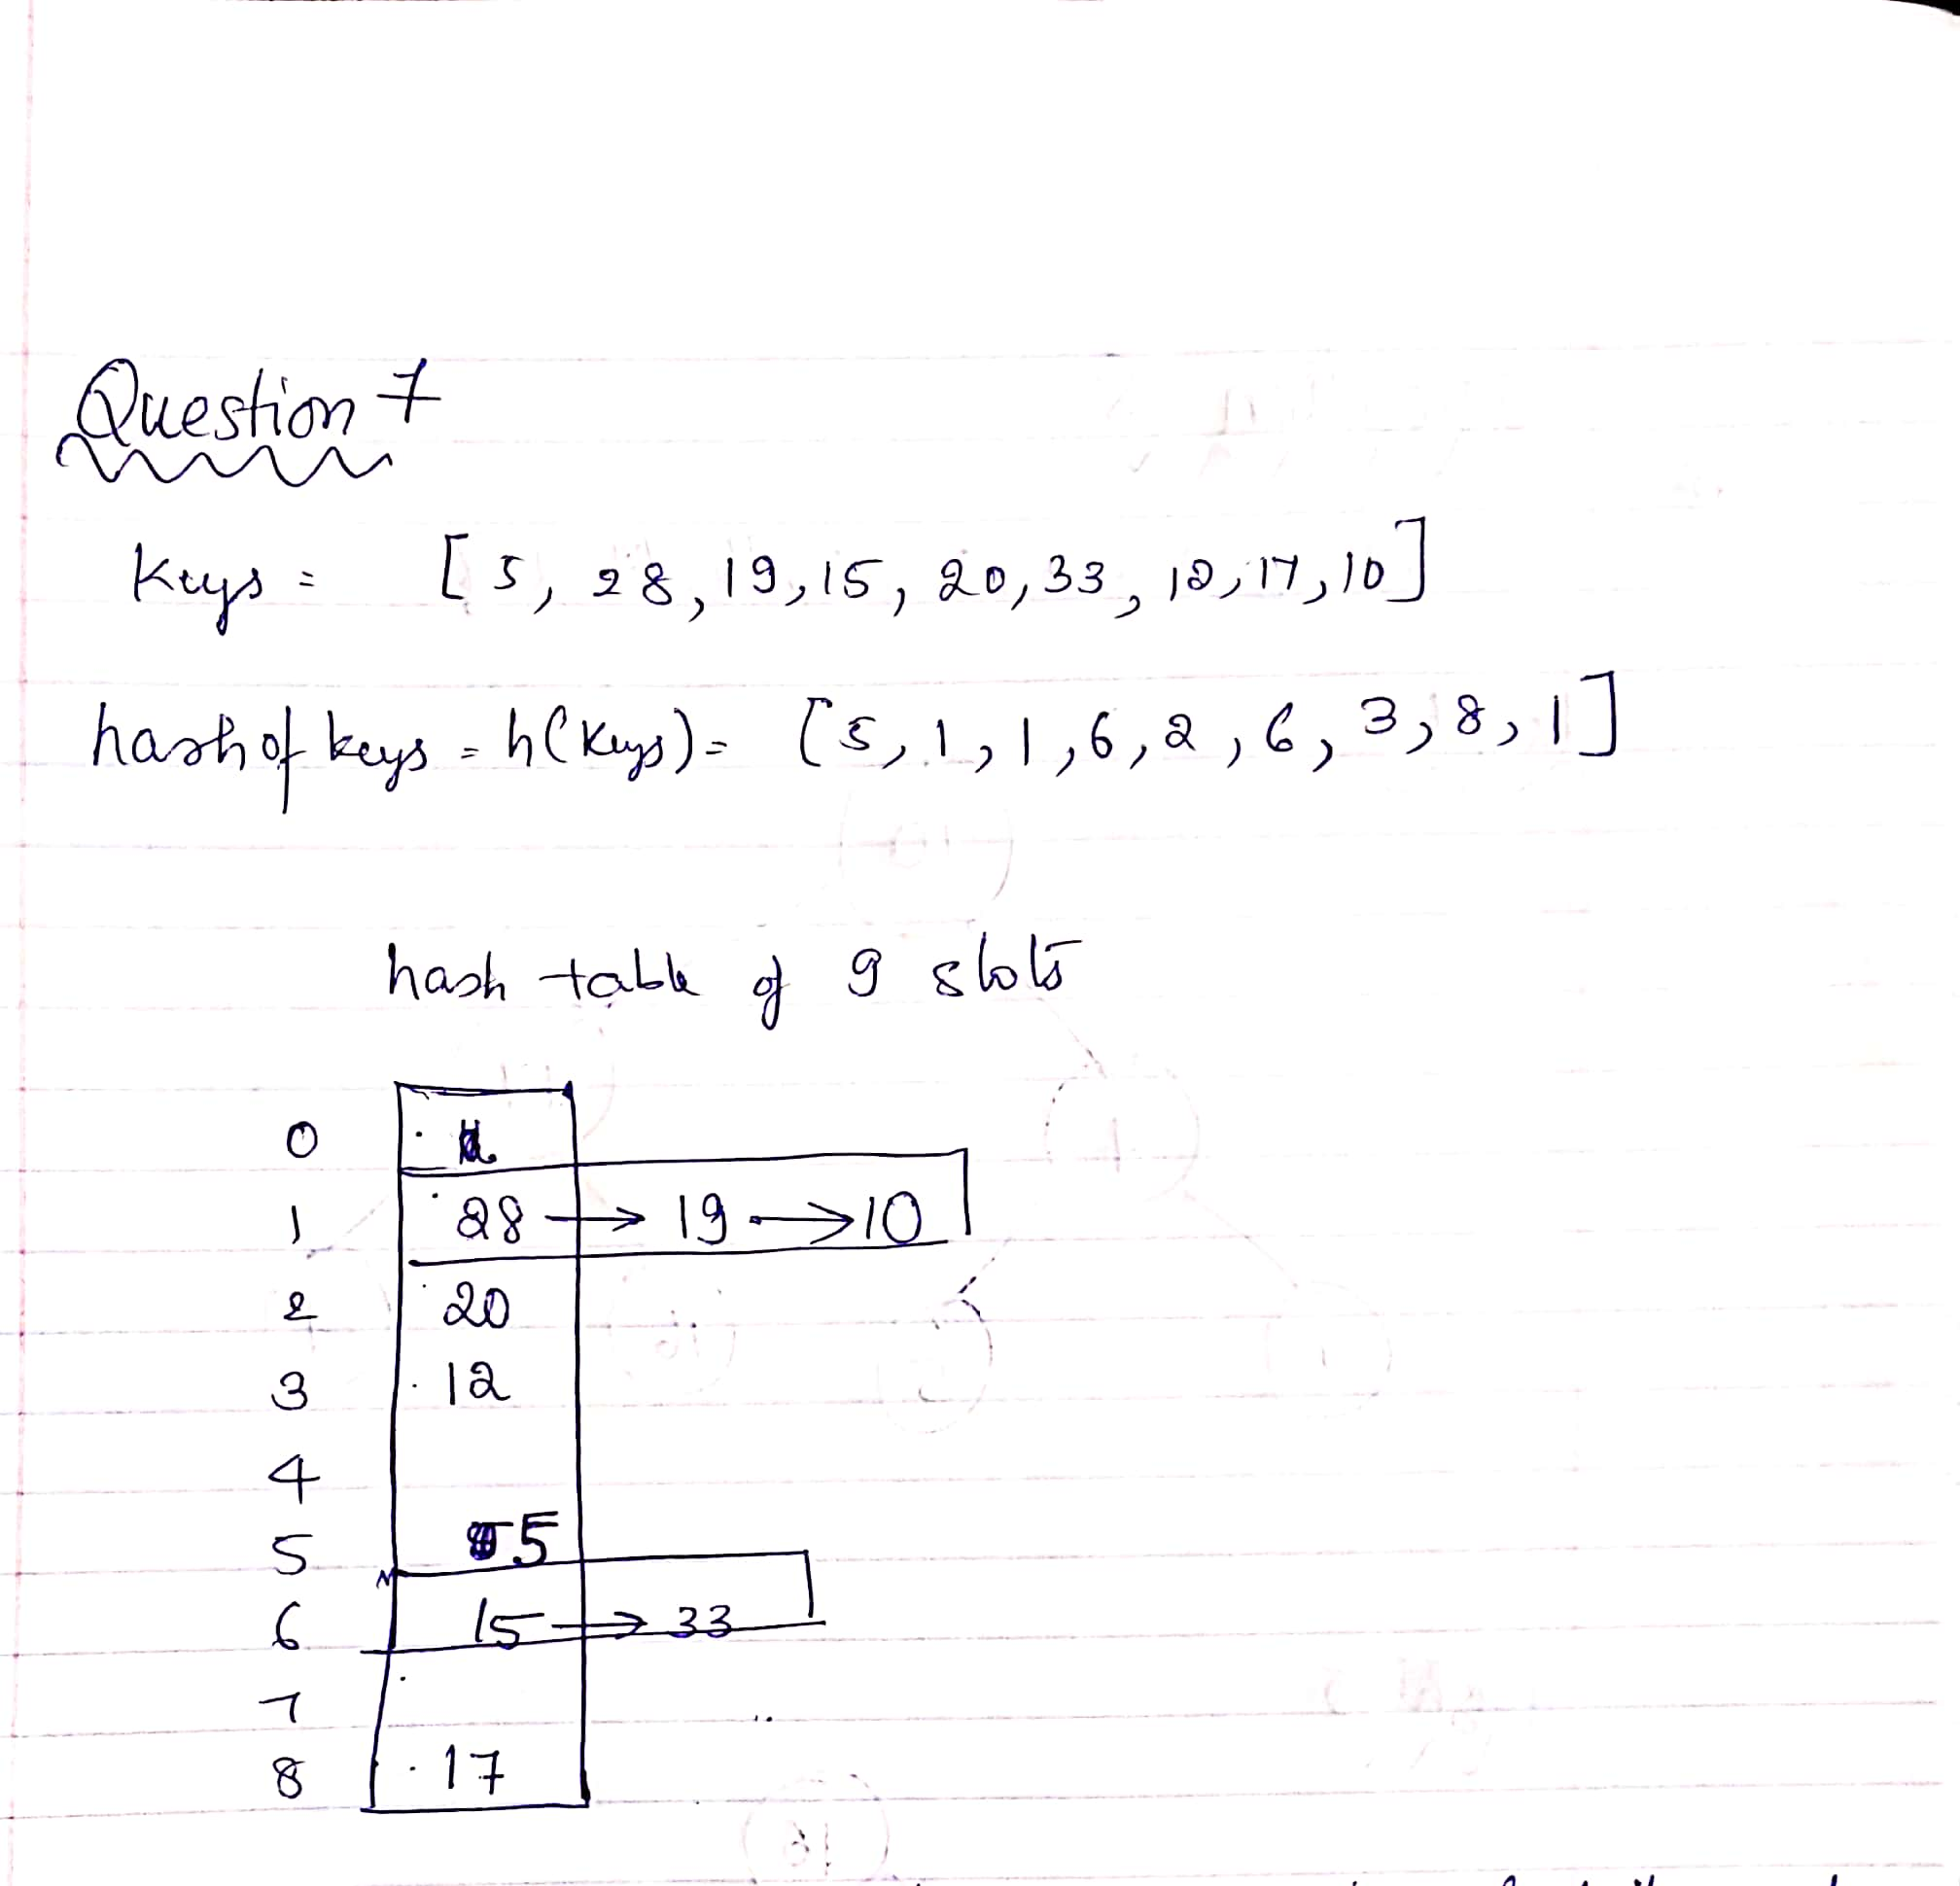

In [25]:
Image(filename = PATH + "Q7.jpg",width = 600,height = 200)

In [4]:
"""
Code of implementation of Hash Table
"""

class linkedList():
    
    def __init__(self, value):
        
        self.value = value
        self.next = None
        pass
    def setNext(self,Obj):
        self.next = Obj
    def setValue(self,value):
        self.value = value
    def getNext(self):
        
        return self.next
    
    def getValue(self):
        return self.value
    
    
class hashTable():
    
    def __init__(self):
        self.HashTable = None
        self.size = None
    def createHashTable(self,size):
        self.HashTable = [None for i in range(size)]
        self.size = size
    
    def getHashVal(self,key):
        return key % self.size
    
    def insertToTable(self,key):
        indexInhash = self.getHashVal(key)
        
        if indexInhash < self.size:
            if self.HashTable[indexInhash] is None:
                
                self.HashTable[indexInhash] = linkedList(key) 
            
            else:
                nextLinkedList = self.HashTable[indexInhash]
                while True:
                        
                    if nextLinkedList.getNext() is None:
                        nextLinkedList.setNext(linkedList(key))
                        break
                    else:
       
                        nextLinkedList = nextLinkedList.getNext()
                        

    
    def checkKey(self,key):
        indexInhash = self.getHashVal(key)
        if indexInhash < self.size:
            
            if self.HashTable[indexInhash] is None:
                
                return False 
            
            else:
                nextLinkedList = self.HashTable[indexInhash]
                               
                while True:
                    value = nextLinkedList.getValue()
                    
                    if value == key:
                        return True
                        break
                    elif nextLinkedList.getNext() is None:
                        return False
                        break
                    
                    else:
       
                        nextLinkedList = nextLinkedList.getNext()
   





myHashTable = hashTable()
myHashTable.createHashTable(9)
for i in [5, 28, 19, 15, 20, 33, 12, 17, 10]:
    myHashTable.insertToTable(i)    
    
myHashTable.HashTable

myHashTable.checkKey(6)



False

###  Question 8

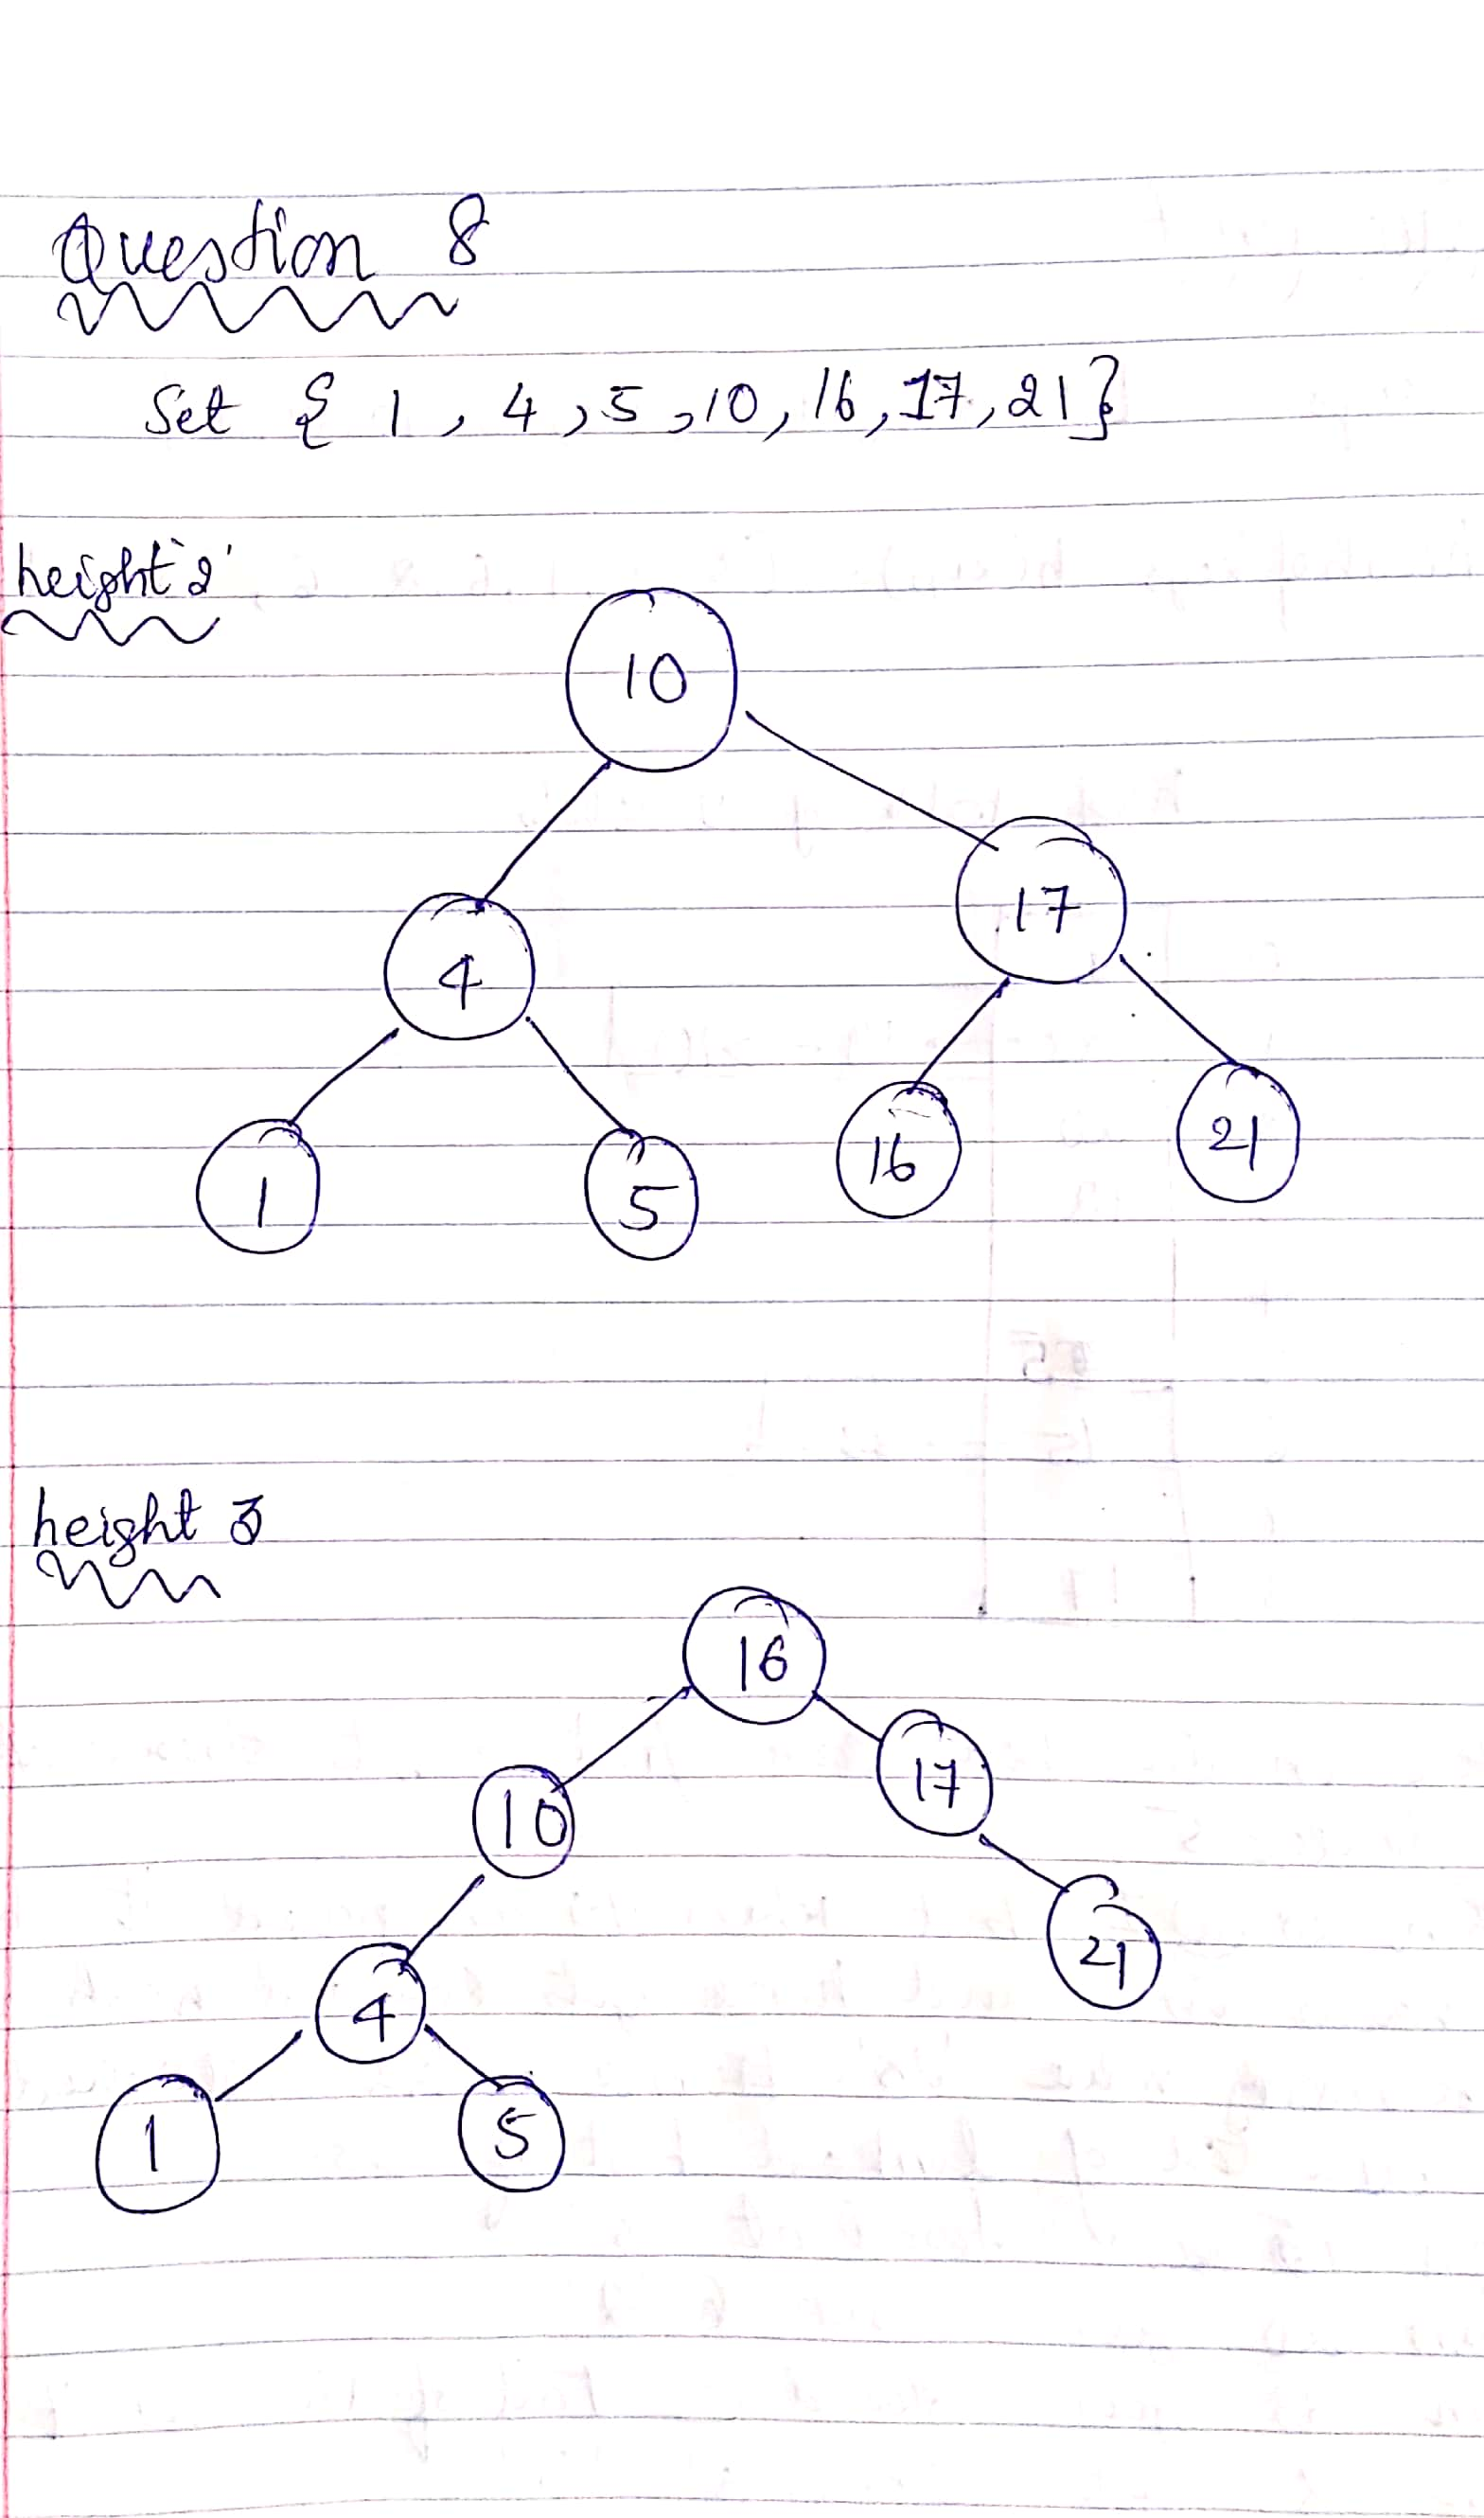

In [32]:
Image(filename = PATH + "Q8_1.jpg",width = 400,height = 100)

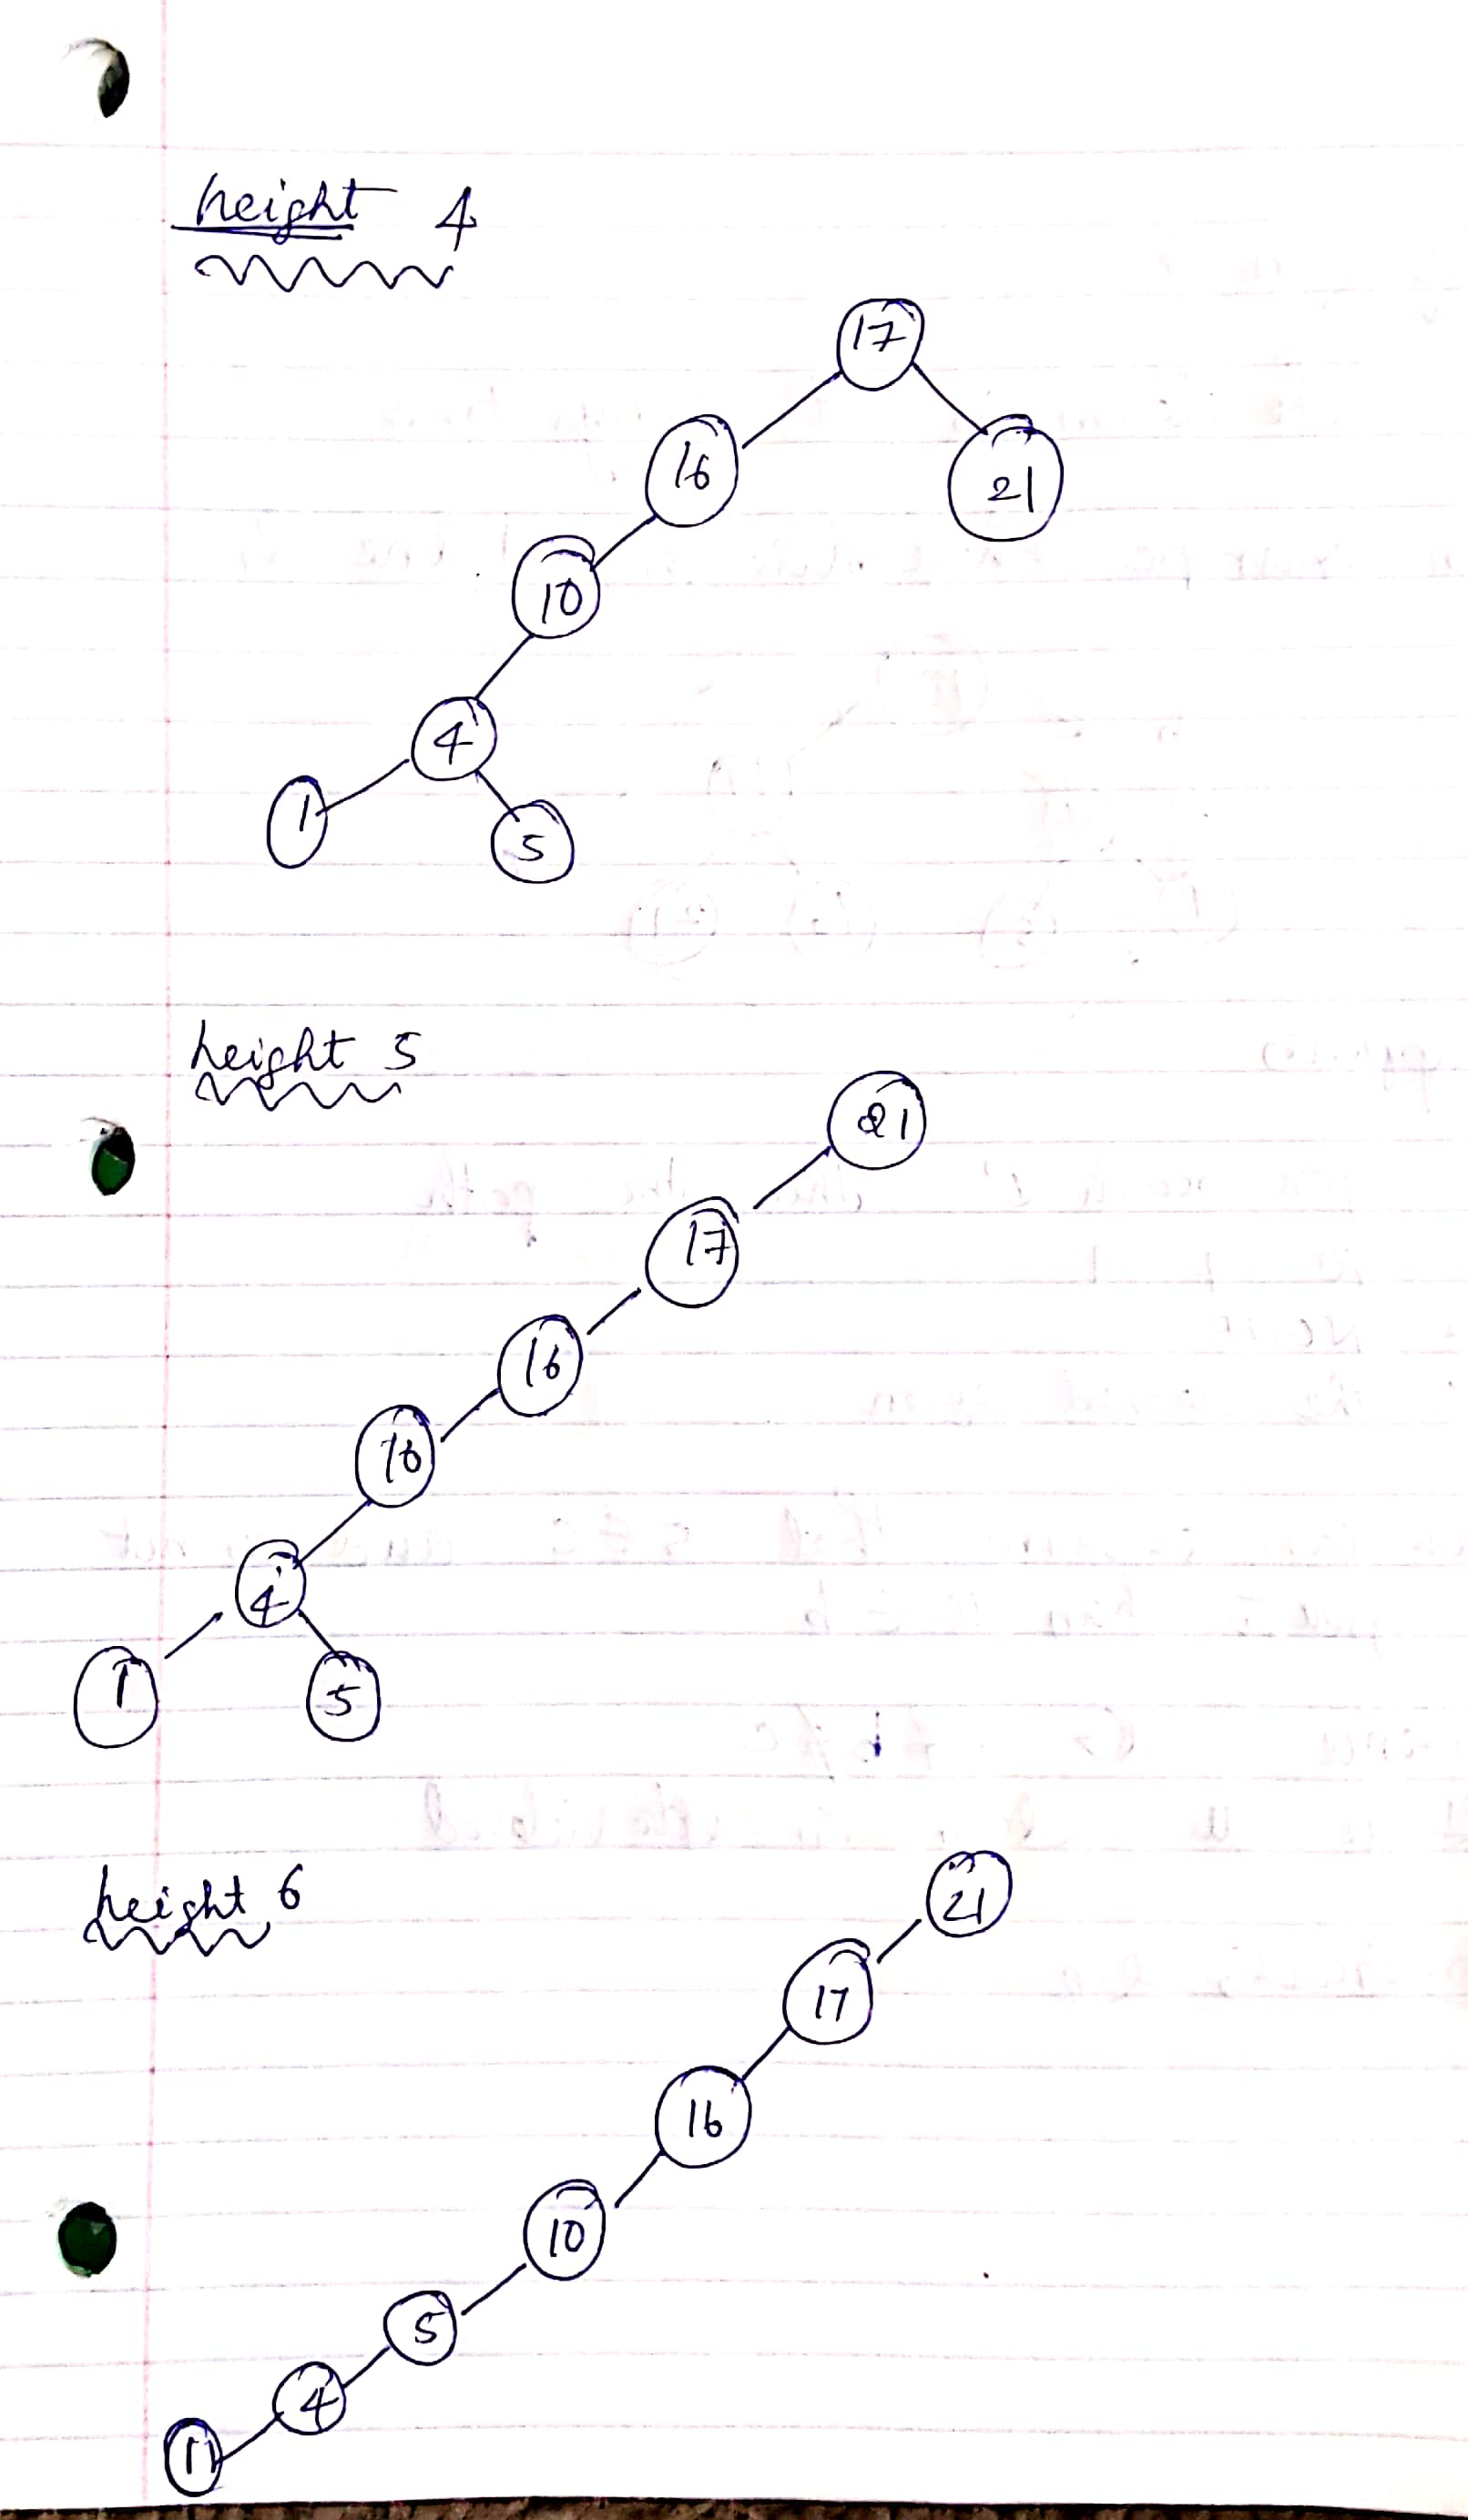

In [31]:
Image(filename = PATH + "Q8_2.jpg",width = 400,height = 100)

### Question 9

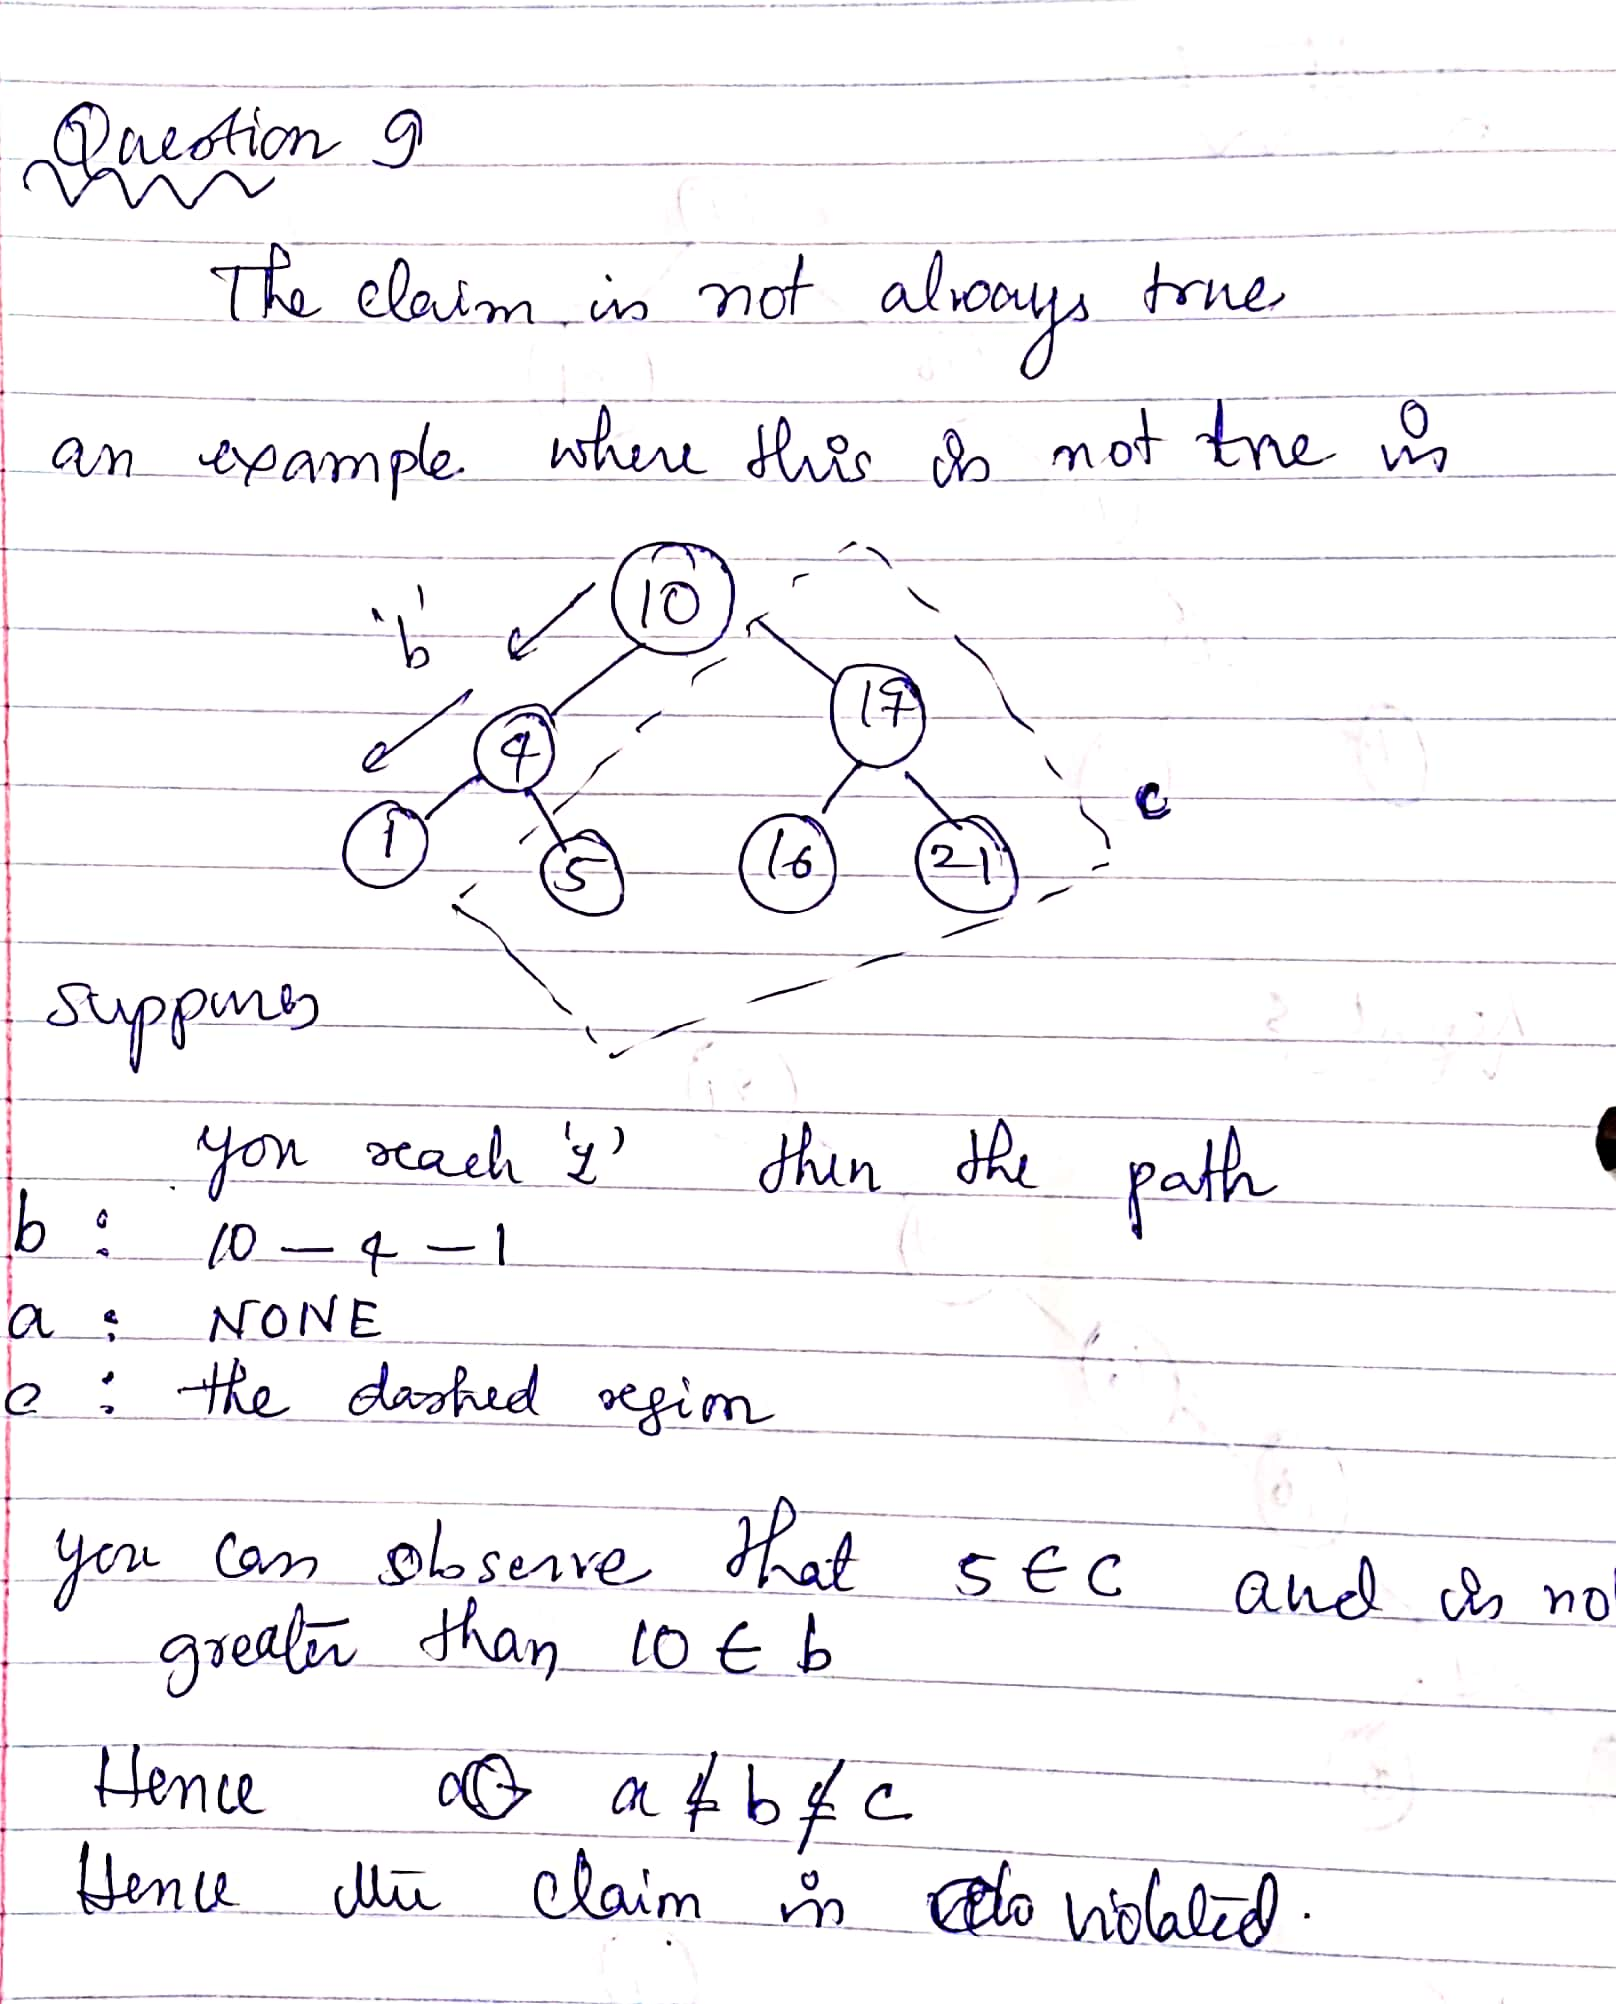

In [21]:
Image(filename = PATH + "Q9_1.jpg",width = 600,height = 200)

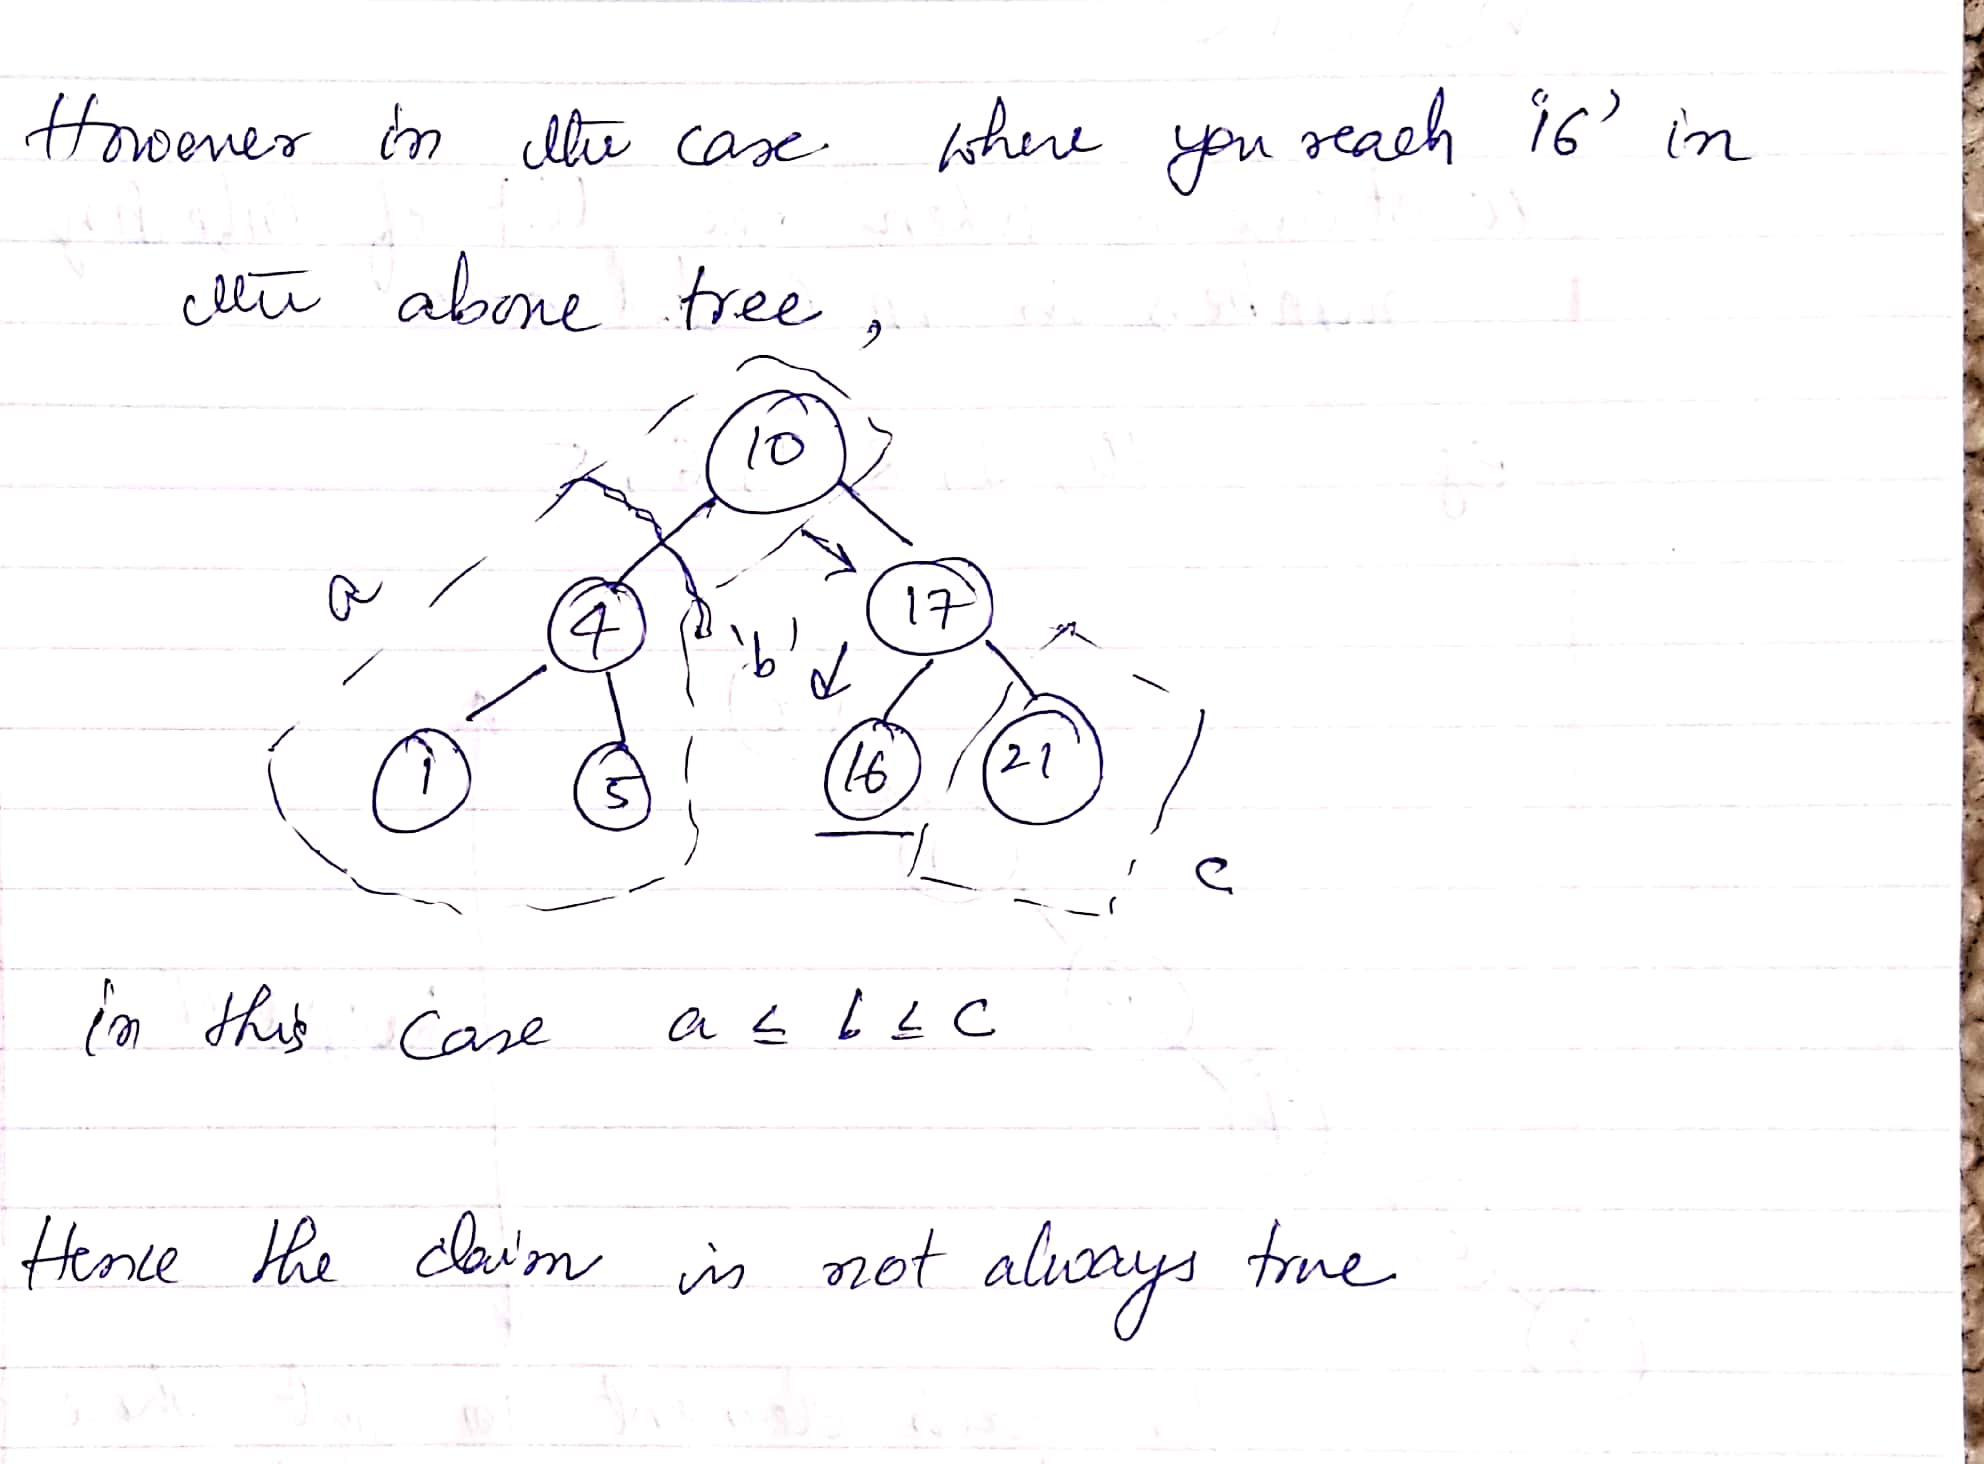

In [22]:
Image(filename = PATH + "Q9_2.jpg",width = 600,height = 200)

### Question 10

There are two parts in this algorithm,
1. Building the tree by inserting elements one by one this would take cost proprtianal to the height of the tree
2. Then taking a inorder tree walk , this takes O(n) time as we would visit every node in the tree.

**Worst Case Scenario** <br>
Worst case scenario occurs when the list given is sorted either in ascending or descending order <br>
For each element insert there are n traversals i.e height of the tree which is highly unbalanced.<br>
Hence the worst case time for binary tree of height N is $O(N^2)$ i.e N* Height of the Tree.<br>
As each insert takes N traversals.

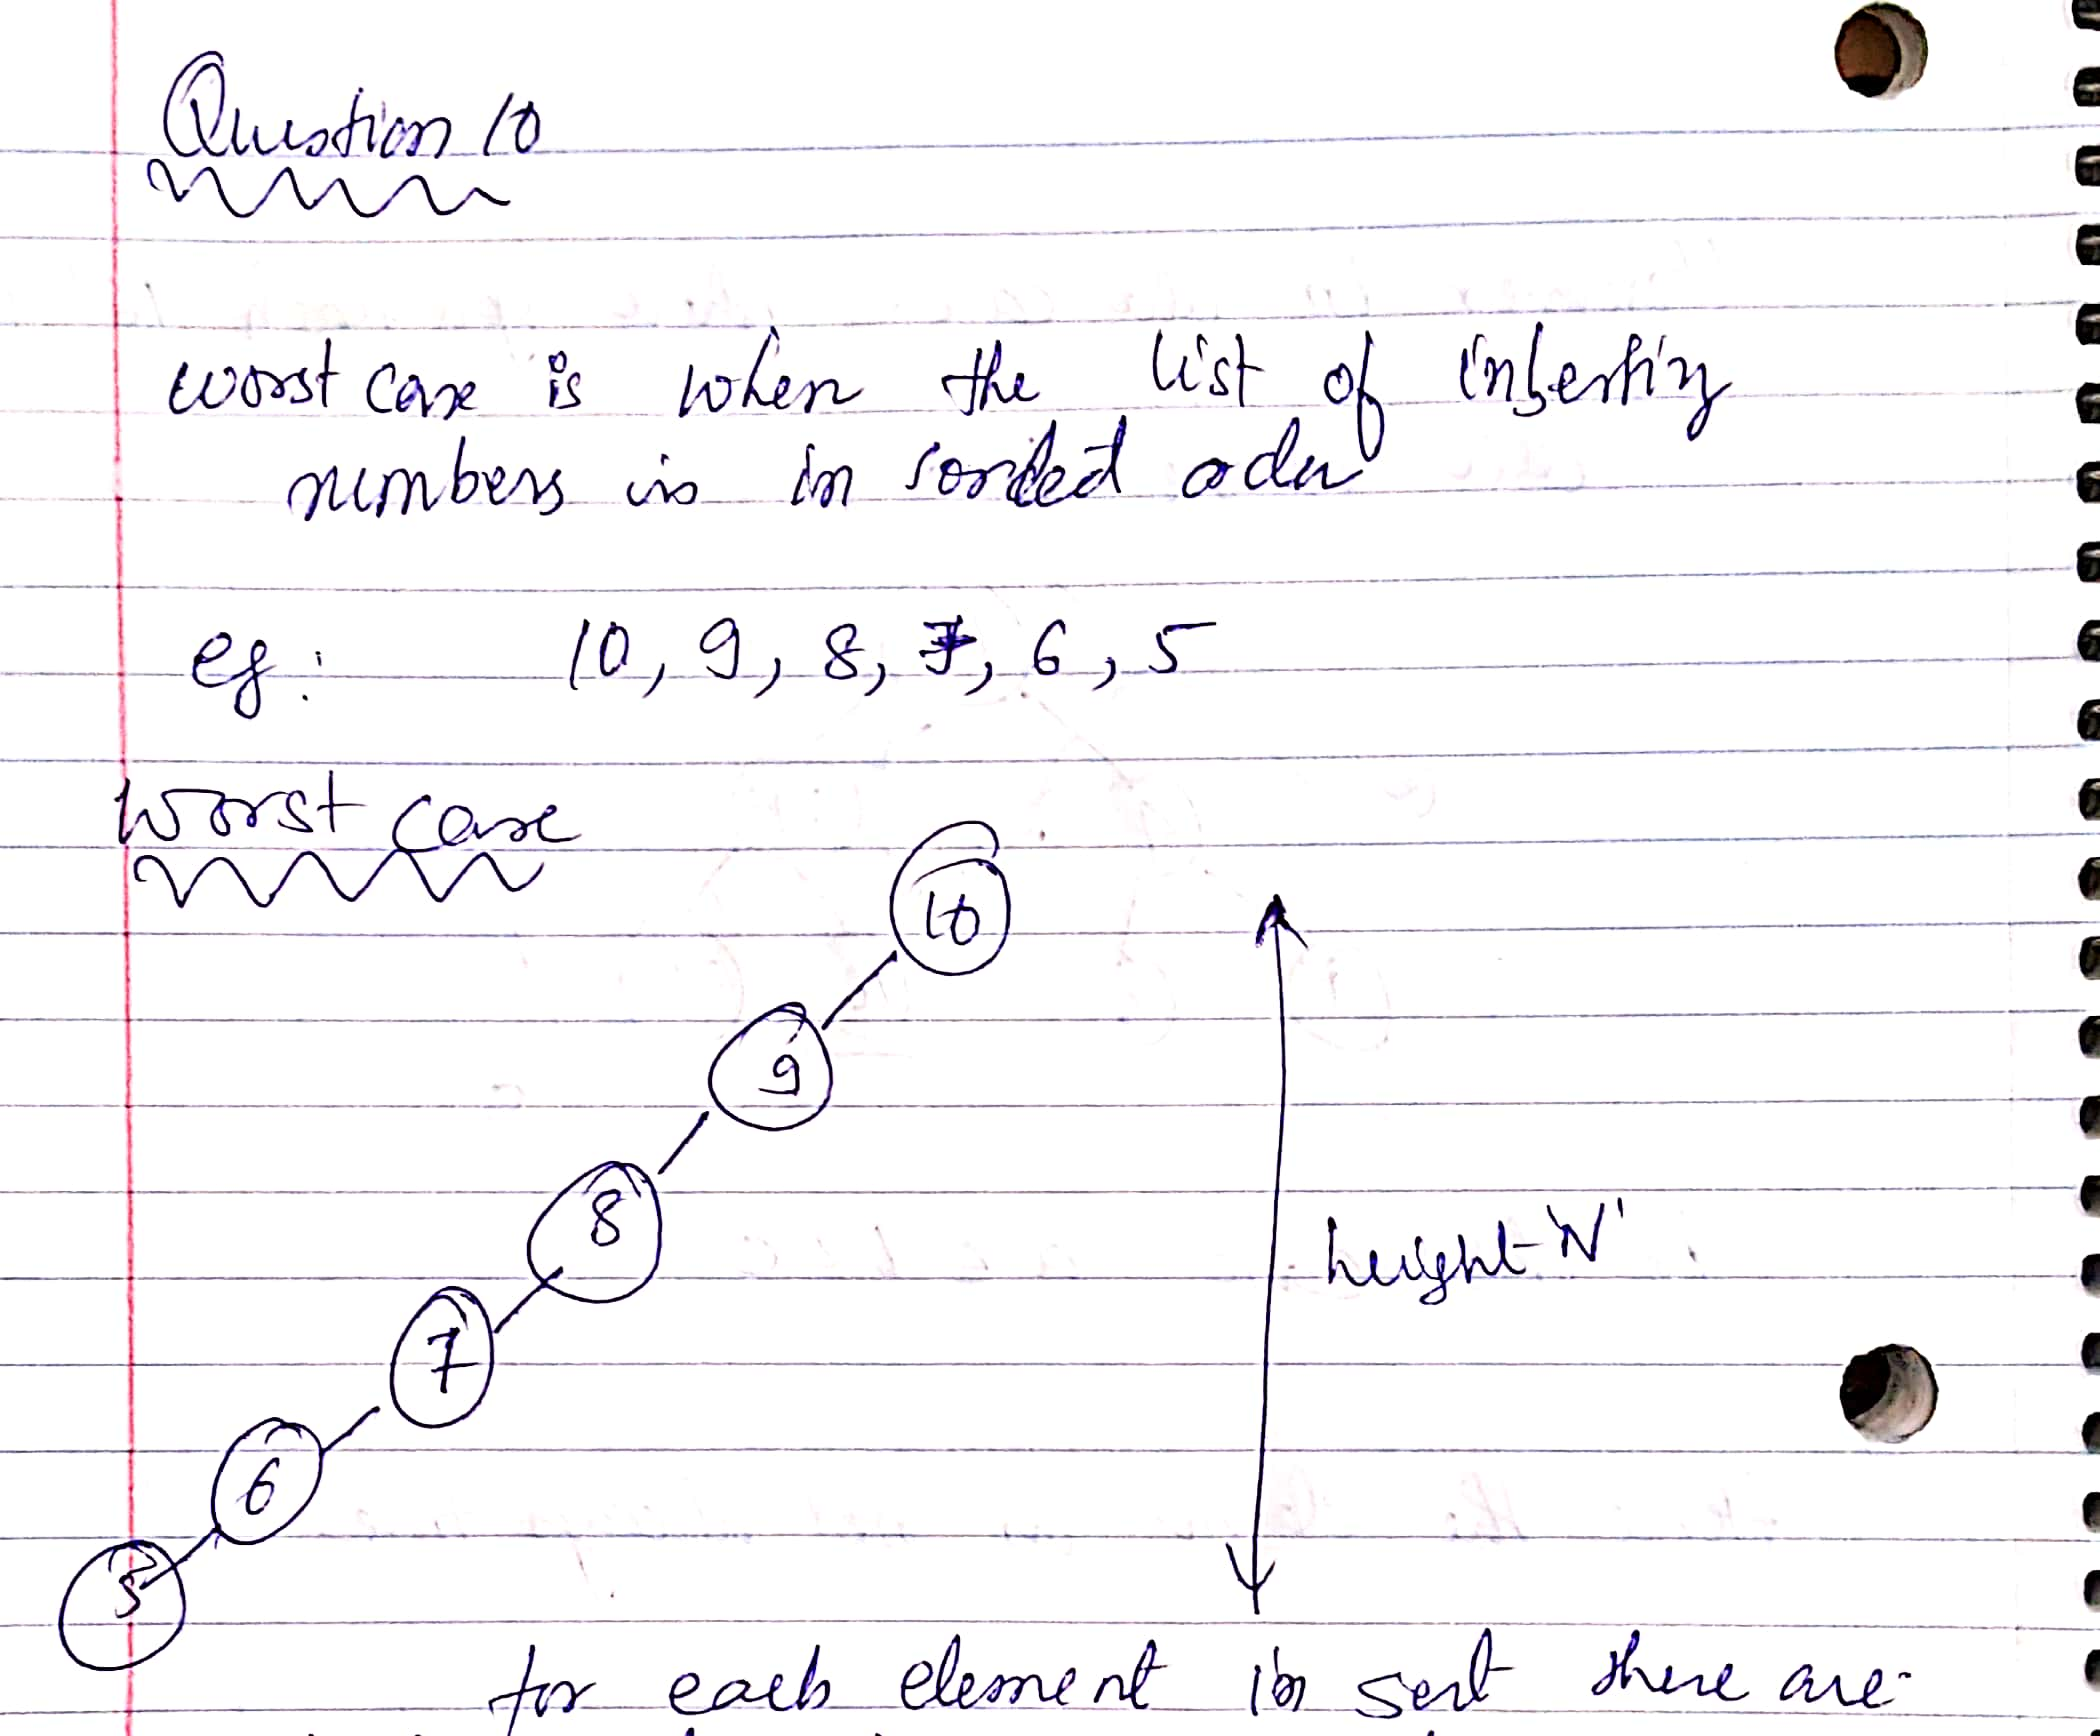

In [37]:
Image(filename = PATH + "Q_10_1.jpg",width = 400,height = 100)

**Best Case Scenario ** <br>

When the list of elements that are being inserted is in a order that makes the tree balanced.<br>
Each insert takes a cost equal to hieght of the tree i.e $log_2N$ <br>
Hence N inserts take $O(Nlog_2N)$ time.

Say,
1. First element is the median of the entire array
2. Second element in the list is the median of the left sub array split by the first
3. Third element is the median of the right sub array split by the first and so on
4. This would result in a balanced tree and hence be the best case scenario with height $log_2N$

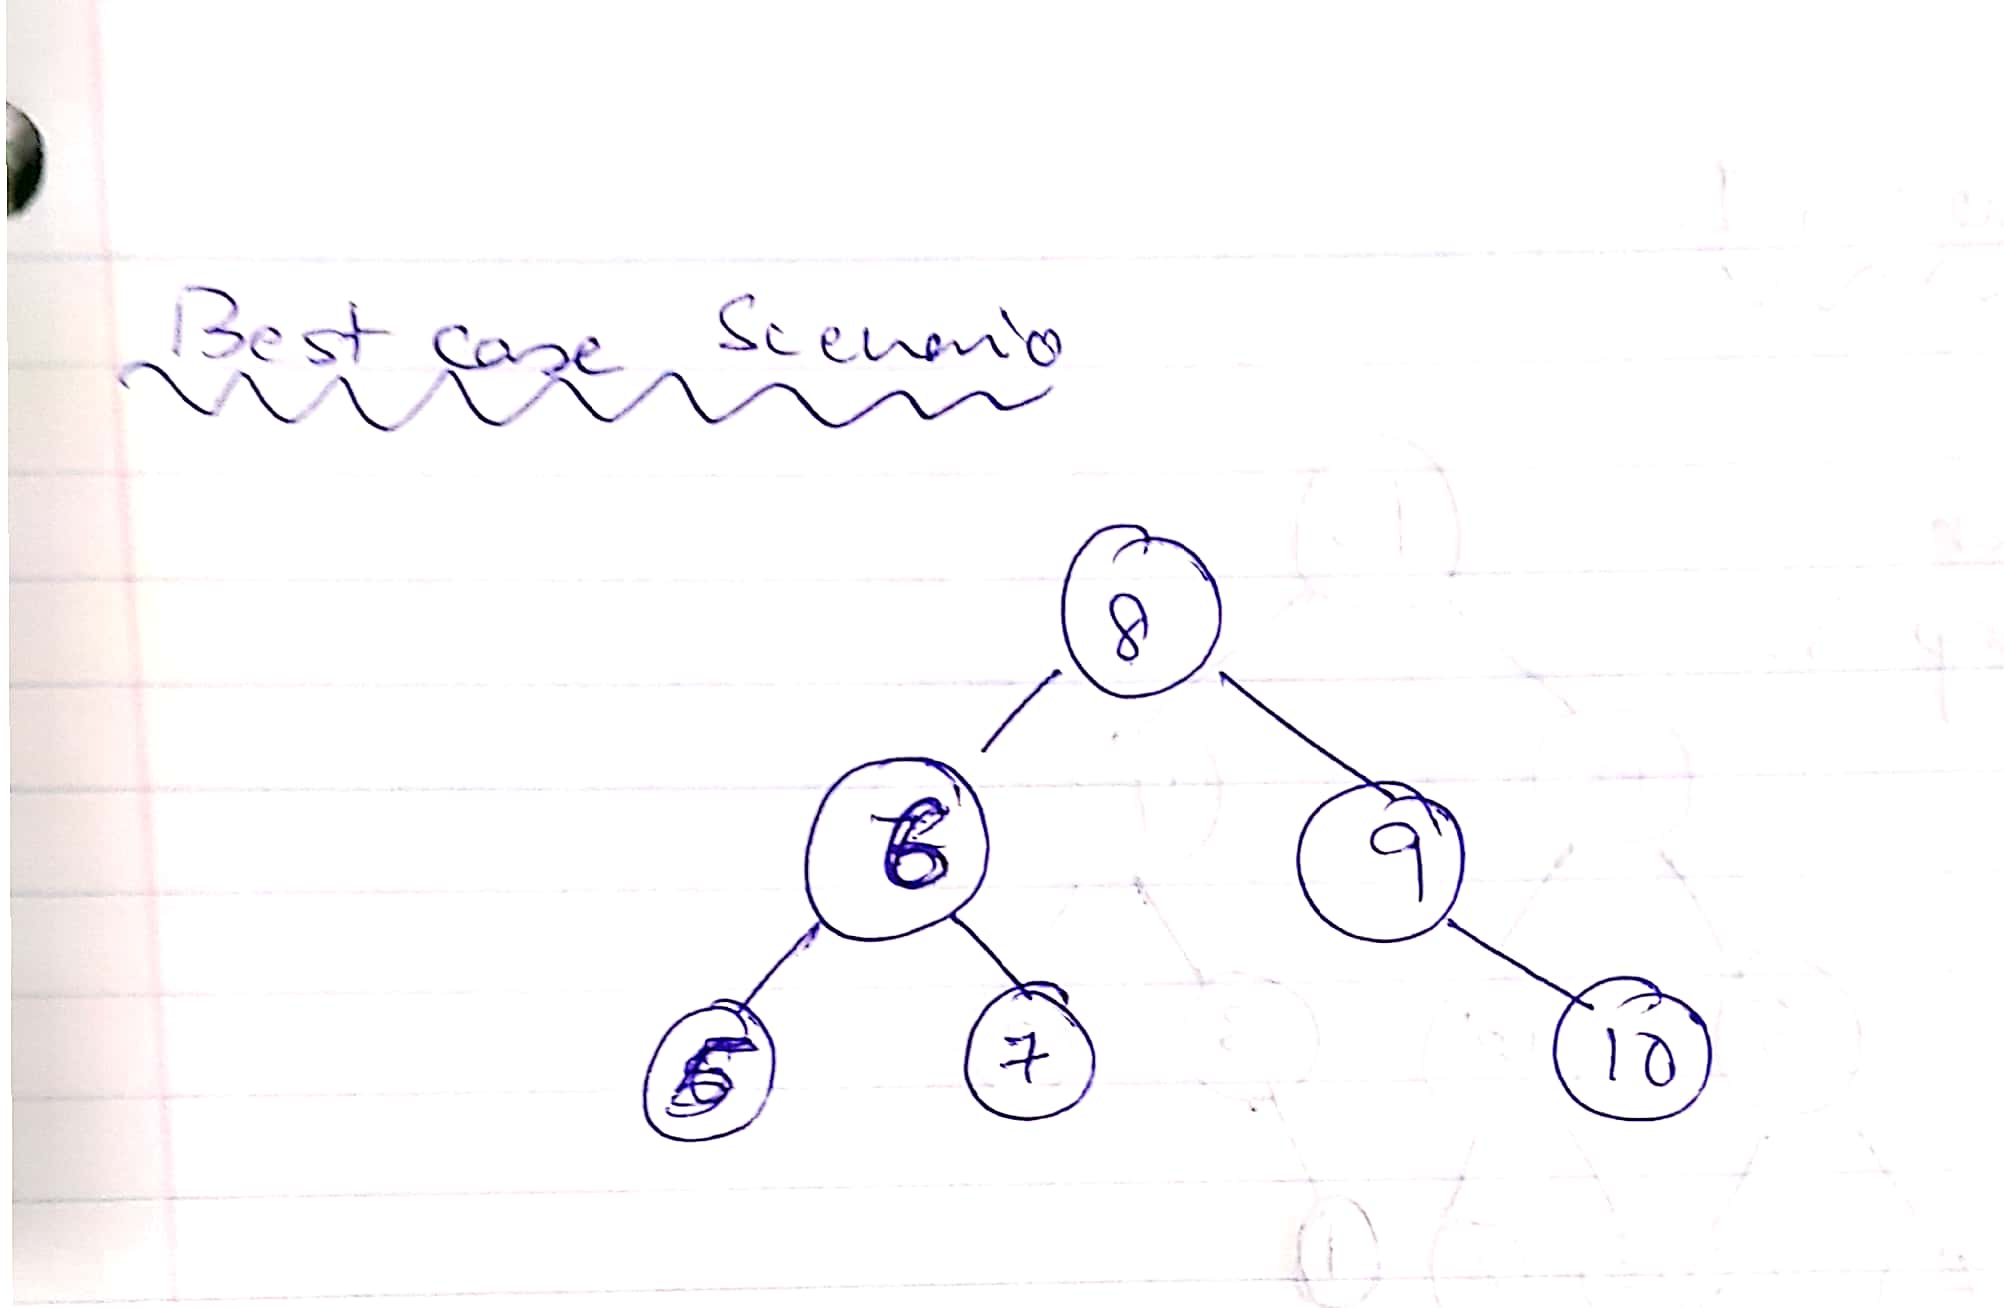

In [39]:
Image(filename = PATH + "Q_10_2.jpg",width = 400,height = 80)